### Unsupervised learning

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import os
import shutil

In [2]:
# define the dir
images_dir = './images/aculei-images'
csv_dir = './datasets'

In [3]:
# import the dataset
df = pd.read_csv(csv_dir + '/aculei.csv', index_col=0)

In [4]:
# some type changes
df['date'] = pd.to_datetime(df['date'])
df['date_time'] = pd.to_datetime(df['date_time'])

In [5]:
# map the moon column in numbers the
moon_phases = df['moon'].dropna().unique()
values = [i for i in range(1, len(moon_phases) + 1)] 
map = dict(zip(moon_phases, values))

df['moon_int'] = df['moon'].apply(lambda x: map.get(x))

In [6]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df['hour'] = df['date_time'].dt.hour
df['minute'] = df['date_time'].dt.minute
df['second'] = df['date_time'].dt.second

# perform one-hot encoding on the new time columns
encoded_columns = pd.get_dummies(df[['hour', 'minute', 'second', 'year', 'month', 'day']])

df_encoded_time = pd.concat([df, encoded_columns], axis=1) 

In [7]:
df.head()

,image_name,camera,date_time,date,time,moon,temp,sha-256,moon_int,year,month,day,hour,minute,second
0,TF_ACULEI_8040_DSCF0129.jpg,1.0,2021-07-22 23:04:07,2021-07-22,23:04:07,Full Moon,25.0,00917733a6aa7e574a2da861dc75b70f5e38db45b50983...,1.0,2021.0,7.0,22.0,23.0,4.0,7.0
1,TF_ACULEI_900_DSCF0756.jpg,1.0,2021-05-27 22:01:44,2021-05-27,22:01:44,Full Moon,16.0,01b46bf7f72f5ecd35669d876892619192c50771d44949...,1.0,2021.0,5.0,27.0,22.0,1.0,44.0
2,TF_ACULEI_15294_DSCF0133.jpg,6.0,2023-03-30 20:35:58,2023-03-30,20:35:58,First Quarter,9.0,a4080d64cc86785ee8ab82468db78b14e4ddb9838faef6...,2.0,2023.0,3.0,30.0,20.0,35.0,58.0
3,TF_ACULEI_11374_DSCF0064.jpg,6.0,2022-06-09 21:29:59,2022-06-09,21:29:59,Waxing Gibbous,15.0,314a99154f1709a8a6ac99069b1af4cebf0cc9df089ce4...,3.0,2022.0,6.0,9.0,21.0,29.0,59.0
4,TF_ACULEI_4106_DSCF4336.jpg,1.0,2021-06-16 23:41:09,2021-06-16,23:41:09,First Quarter,19.0,f1c6a3c629f9fb55975f6e02eeeccbd708477ddcf574e5...,2.0,2021.0,6.0,16.0,23.0,41.0,9.0


In [8]:
df_cluster = df.copy()
df_cluster.dropna(inplace=True)

# from the cluser df extract another subset
cols = ['camera', 'moon_int', 'year', 'month', 'hour', 'temp']
df_kmeans = df_cluster[cols].copy()

In [9]:
# defining the model
model = KMeans(n_clusters=6)

# fitting data
model.fit(df_kmeans)

# predictions
all_predictions = model.predict(df_kmeans)

# adding the results to the df cluster
df_cluster['cluster'] = all_predictions

In [10]:
df_cluster.head()

,image_name,camera,date_time,date,time,moon,temp,sha-256,moon_int,year,month,day,hour,minute,second,cluster
0,TF_ACULEI_8040_DSCF0129.jpg,1.0,2021-07-22 23:04:07,2021-07-22,23:04:07,Full Moon,25.0,00917733a6aa7e574a2da861dc75b70f5e38db45b50983...,1.0,2021.0,7.0,22.0,23.0,4.0,7.0,1
1,TF_ACULEI_900_DSCF0756.jpg,1.0,2021-05-27 22:01:44,2021-05-27,22:01:44,Full Moon,16.0,01b46bf7f72f5ecd35669d876892619192c50771d44949...,1.0,2021.0,5.0,27.0,22.0,1.0,44.0,1
2,TF_ACULEI_15294_DSCF0133.jpg,6.0,2023-03-30 20:35:58,2023-03-30,20:35:58,First Quarter,9.0,a4080d64cc86785ee8ab82468db78b14e4ddb9838faef6...,2.0,2023.0,3.0,30.0,20.0,35.0,58.0,5
3,TF_ACULEI_11374_DSCF0064.jpg,6.0,2022-06-09 21:29:59,2022-06-09,21:29:59,Waxing Gibbous,15.0,314a99154f1709a8a6ac99069b1af4cebf0cc9df089ce4...,3.0,2022.0,6.0,9.0,21.0,29.0,59.0,5
4,TF_ACULEI_4106_DSCF4336.jpg,1.0,2021-06-16 23:41:09,2021-06-16,23:41:09,First Quarter,19.0,f1c6a3c629f9fb55975f6e02eeeccbd708477ddcf574e5...,2.0,2021.0,6.0,16.0,23.0,41.0,9.0,1


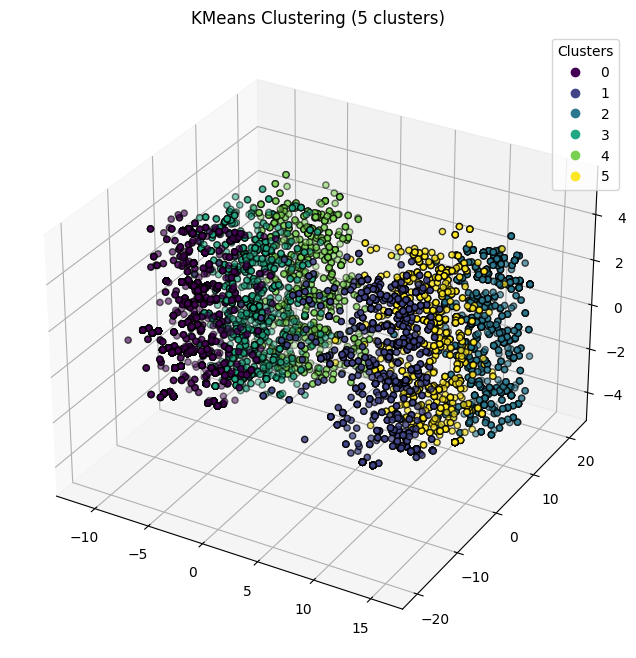

In [11]:
# Perform PCA to reduce dimensions for visualization (in this case, 3 dimensions)
pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(df_kmeans)

# Visualize the clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    reduced_data_3d[:, 0],
    reduced_data_3d[:, 1],
    reduced_data_3d[:, 2],
    c=all_predictions,
    cmap='viridis',
    edgecolor='k'
)

ax.set_title('KMeans Clustering (5 clusters)')
# ax.set_xlabel('Principal Component 1')
# ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title='Clusters')
plt.show()


In [12]:
# for cluster_label in df_cluster['cluster'].unique():
    
#     directory_path = f'./clusters/cluster-{cluster_label}'
#     os.makedirs(directory_path, exist_ok=True)
    
#     cluster_images = df_cluster[df_cluster['cluster'] == cluster_label]['image_name']
    
#     for image_name in cluster_images:
#         source_image_path = f'{images_dir}/{image_name}'
#         destination_image_path = f'{directory_path}/{image_name}'
        
#         shutil.copyfile(source_image_path, destination_image_path)

In [13]:
df_cluster.to_csv(csv_dir + '/clusters.csv')